### Some other Classification and Regression Models

![alt text](https://cdn-images-1.medium.com/max/1600/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

If your linear model contains many predictor variables or if these variables are correlated, the standard OLS parameter estimates have large variance, thus making the model unreliable.

> To picture this let’s say we’re doing a study that looks at a response variable — patient weight, and our predictor variables would be height, sex, and diet. The problem here is that height and sex are also correlated and can inflate the standard error of their coefficients which may make them seem statistically insignificant.

To counter this, you can use regularization - a technique allowing to decrease this variance at the cost of introducing some bias. Finding a good bias-variance trade-off allows to minimize the model's total error.

To produce a more accurate model of complex data we can add a penalty term to the OLS equation. A penalty adds a bias towards certain values.

![alt text](https://hackernoon.com/hn-images/1*Zma9hTrGfMHfyI-XHy5Cmw.png)

![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418451/tradeoff_sevifm.png)

There are three popular regularization techniques, each of them aiming at decreasing the size of the coefficients:

- Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).
- Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).
- Elastic Net, a convex combination of Ridge and Lasso.

# [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

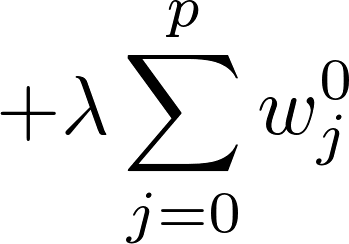Ridge regression uses L2 regularization which adds the following penalty term to the OLS equation: 
![alt text](https://hackernoon.com/hn-images/1*mtSQs8b4zz7iY8kWRiPujQ.png)

Ridge regression decreases the complexity of a model but does not reduce the number of variables, it rather just shrinks their effect.

Removing predictors from the model can be seen as settings their coefficients to zero. Instead of forcing them to be exactly zero, let's penalize them if they are too far from zero, thus enforcing them to be small in a continuous way. This way, we decrease model complexity while keeping all variables in the model. This, basically, is what Ridge Regression does

# [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)


Lasso regression uses the L1 penalty term and stands for Least Absolute Shrinkage and Selection Operator. 
![alt text](https://hackernoon.com/hn-images/1*2Oey1G0E69JZRvWazoETng.png)

This can eliminate some features entirely and give us a subset of predictors that helps mitigate multi-collinearity and model complexity. Predictors not shrunk towards zero signify that they are important and thus L1 regularization allows for feature selection 

# [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

A third commonly used model of regression is the Elastic Net which incorporates penalties from both L1 and L2 regularization:

![alt text](https://hackernoon.com/hn-images/1*gAmw-_z6v4bG9HcnPSAK3Q.png)

Effectively this will shrink some coefficients and set some to 0 for sparse selection.

___
For instance, we define the simple linear regression model Y with an independent variable:

For this model, W and b represents “weight” and “bias” respectively, such as


***W= w1, w2, w3, ......... wn***

And,

***b=b1, b2, b3, ......... bn***

And Ŷ is the predicted result such that

***Ŷ= w1 x1 +w2 x2 +......+wn xn, + b***

The below function calculates an error without the regularization function

***Loss= Error (Y, Ŷ)***


Cost function with L1 penalization:

![alt text](https://lh4.googleusercontent.com/KIdJQC1x4Lj1mgdYd7ZI0qT9f494vIbXU8KLenTlFd8M8gOZqDLfbUJiCmmGdcAK-3cbU0cAsnNAQKbuU9lpl0UL1hhNxKncf0rzDus0jPQVtL69DXen_TbMYm7A0w8IEheel1bu)

Cost function with L2 penalization:

![alt text](https://lh4.googleusercontent.com/TN9UtmWICsaPtHNNharrOMwkjhOUKvgQgm0dLUcL8u4Dd3_3Di1VpjN8k-OeYa3T4KtliomldjCK9bYeRERDgSWWyu8meHM3ZYlQI4CL1eUe-kn9F7EeGSl5zvB6XLEIODE5l6y2)

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import linear_model

from sklearn import svm

In [74]:
boston = datasets.load_boston()
df = pd.DataFrame(data = np.c_[boston['data'], boston['target']],
                    columns = list(boston['feature_names'])+ ['target'])

C:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:

In [75]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [76]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [77]:
x = df.drop(['target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

### Linear Regression

In [78]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(linreg.coef_)

[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]


C:\python\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\python\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [79]:
print('Linear regression mse: ' + str(mean_squared_error(y_test, y_pred)))
print('Linear regresssion r2: ' + str(r2_score(y_test, y_pred)))

Linear regression mse: 23.380836480270247
Linear regresssion r2: 0.763417443213847


### Ridge

In [92]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
print(ridge.coef_)

[-1.09155977e-01  5.84215921e-02 -6.59599834e-03  2.01445014e+00
 -1.39428516e+01  3.14390988e+00 -2.06521456e-04 -1.41706889e+00
  2.92584226e-01 -1.16575218e-02 -9.25297214e-01  7.61355227e-03
 -5.51331167e-01]


C:\python\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\python\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [93]:
print('Ridge mse: ' + str(mean_squared_error(y_test, y_pred)))
print('Ridge r2: ' + str(r2_score(y_test, y_pred)))

Ridge mse: 23.177760713764265
Ridge r2: 0.7654722963026933


### Lasso

In [105]:
lasso = linear_model.Lasso(alpha=.5)
#alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object.
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)
print(lasso.coef_)

[-0.08502862  0.05902397 -0.02933428  0.         -0.          1.7356433
  0.00713279 -0.91048397  0.26353153 -0.01367745 -0.7853728   0.00763055
 -0.6792184 ]


C:\python\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\python\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [103]:
print('Lasso mse: ' + str(mean_squared_error(y_test, y_pred)))
print('Lasso r2: ' + str(r2_score(y_test, y_pred)))

Lasso mse: 24.71649724411225
Lasso r2: 0.7499023562418587


### Elastic Net

In [104]:
elnet = linear_model.ElasticNet(alpha=.5)
elnet.fit(x_train,y_train)
y_pred = elnet.predict(x_test)
print(elnet.coef_)

[-0.09227716  0.06227029 -0.04746994  0.         -0.          1.32930033
  0.01046944 -0.94854353  0.29107143 -0.01438595 -0.8149028   0.00748475
 -0.70413193]


C:\python\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\python\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [106]:
print('Elastic Net mse: ' + str(mean_squared_error(y_test, y_pred)))
print('Elastic Net r2: ' + str(r2_score(y_test, y_pred)))

Elastic Net mse: 28.729991255229727
Elastic Net r2: 0.7092912054989273


Conclusions:

> The bias-variance tradeoff is a tradeoff between a complicated and simple model, in which an intermediate complexity is likely best

> Lasso, Ridge Regression, and Elastic Net are modifications of ordinary least squares linear regression, which use additional penalty terms in the cost function to keep coefficient values small and simplify the model.

> Lasso is useful for feature selection, when our dataset has features with poor predictive power.

> Ridge regression is useful for the grouping effect, in which colinear features can be selected together.

> Elastic Net combines Lasso and ridge regression, potentially leading to a model that is both simple and predictive.

# [Support vector machines - SVM](https://scikit-learn.org/stable/modules/svm.html)



Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

SVC, NuSVC and LinearSVC are classes capable of performing multi-class classification on a dataset.
![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations.

Note that LinearSVC does not accept keyword kernel, as this is assumed to be linear.

SVM is a supervised machine learning algorithm is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In order to understand how it works, let’s consider a rabbit and tiger example (two data points for visual explanation only). Let’s consider a small scenario now for a second pretend you own a farm. Let’s say you have a problem and want to set up a fence to protect your rabbits against the Tigers.

![alt text](https://miro.medium.com/max/426/1*TJy9Zw9VtASpm3OkbcyPdg.png)

**But, where do you build your fence?**

One way to get around a problem is to build a classifier based on the position of the rabbits and tigers. You can classify the group of rabbits as one group and group of tigers as another group
Now, if I try to draw a decision boundary between the rabbits and the tigers it looks like a straight line , now you can clearly build a fence along this line. This is exactly how SVM works, it draws a decision boundary which is a hyperplane between any two classes in order to separate them or classify them.

![alt text](https://miro.medium.com/max/386/1*3jC3tDFZ-Z7JtrM6iBljWg.png)

**But, how do you know where to draw a hyperplane?**

The basic principle behind SVM is to draw a hyperplane that best separates the two classes, in our case the two classes are the rabbits and the Tigers, so you start off by drawing a random hyperplane and then you check the distance between the hyperplane and the closest data points from each class.

![alt text](https://miro.medium.com/max/434/1*B9tREeJxZE29M-7TdMbXKA.png)

These closest on your data points to the hyperplane are known as support vectors and that’s where the name comes from support vector machine so basically, the hyperplane is drawn based on these support vectors. Normally the hyperplane which has the maximum distance from the support vectors is the most optimum hyperplane and this distance between the hyperplane and the support vectors is known as the margin.

![alt text](https://miro.medium.com/max/510/1*QNhJyNy34bjGCl_M_MJNRQ.png)

Let’s say if we add a new data point (another tiger added) and now I want to draw a hyperplane to separate the two classes in the best way. So, I start by drawing a hyperplane as shown in the above picture and then I check the distance between the hyperplane and the support vectors and I try to check whether the margin for this hyperplane is maximum or not. In this case, the margin is less.
In the second scenario, I draw a different hyperplane as shown in the picture below and then I check the distance between the hyperplane and the support vectors and I try to check whether the margin for this hyperplane is maximum or not. Margin is high in this case.


![alt text](https://miro.medium.com/max/482/1*NoPrPKdtkrdEFKUj99gQSg.png)

Margin is high when compared to this hyperplane with the previous one. Therefore, I choose this hyperplane, as a thumb rule, the distance between the support vectors and the hyperplane (margin) should be maximum. This is how we have to choose the hyperplane.
Our data has been linearly separable as of now, which means you can draw a straight line to separate the two classes. What can we do if we have our datapoints as below? We cannot draw a hyperplane as it doesn’t separate the two classes at all.

![alt text](https://miro.medium.com/max/514/1*vI-Se_jQGuUH0EvJxBo-Ug.png)

Non-linear SVM is used when the data can’t be separated using a straight line

We use kernel functions in this case that help transform the data into another dimension that has a clear dividing margin between the two classes. Kernel functions help transform non-linear spaces into linear spaces.

![alt text](https://66.media.tumblr.com/9bffea56372d28d2a30f80557451e824/tumblr_inline_o9aabehtqP1u37g00_540.png)

In [112]:
iris_ds = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris_ds['data'], iris_ds['target']],
                    columns= iris_ds['feature_names'] + ['target'])

In [113]:
x = iris.drop(['target'], axis=1)
y = iris['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

In [114]:
iris_ds


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [115]:
clf = svm.SVC(gamma='scale')
clf.fit(x_train, y_train) 

SVC()

In [116]:
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [117]:
clf = svm.NuSVC(gamma='scale')
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [119]:
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [120]:
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x, y) 
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [121]:
clf = svm.SVC(kernel='poly', gamma='scale')
clf.fit(x, y) 
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

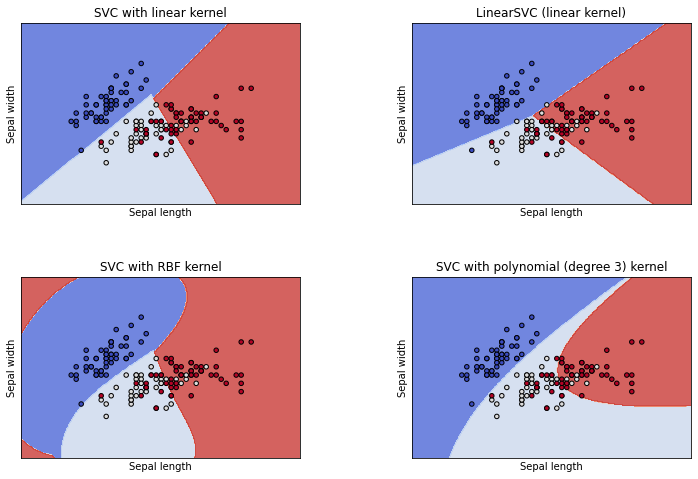

In [124]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
# plt.figure()
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### K Nearest Neighbours

K-nearest neighbors (kNN) is a supervised machine learning algorithm that can be used to solve both classification and regression tasks.

Look at kNN as an algorithm that comes from real life. People tend to be affected by the people around them. Our behaviour is guided by the friends we grew up with. Our parents also shape our personality in some ways. If you grow up with people who love sports, it is higly likely that you will end up loving sports. There are ofcourse exceptions. kNN works similarly.

> The value of a data point is determined by the data points around it.

If you have one very close friend and spend most of your time with him/her, you will end up sharing similar interests and enjoying same things. That is kNN with k=1.

If you always hang out with a group of 5, each one in the group has an effect on your behavior and you will end up being the average of 5. That is kNN with k=5.

kNN classifier determines the class of a data point by majority voting principle. If k is set to 5, the classes of 5 closest points are checked. Prediction is done according to the majority class. Similarly, kNN regression takes the mean value of 5 closest points.

We observe people who are close but how data points are determined to be close? The distance between data points is measured. There are many methods to measure the distance. Euclidean distance (minkowski distance with p=2) is one of most commonly used distance measurement. The figure below shows how to calculate euclidean distance between two points in a 2-dimensional space. It is calculated using the square of the difference between x and y coordinates of the points.

![alt text](https://miro.medium.com/max/789/1*mFNKqdk8OEoRuZTD6Gnepw.png)

In [126]:
from sklearn.datasets import make_blobs #synthetic dataset
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #train and test sets

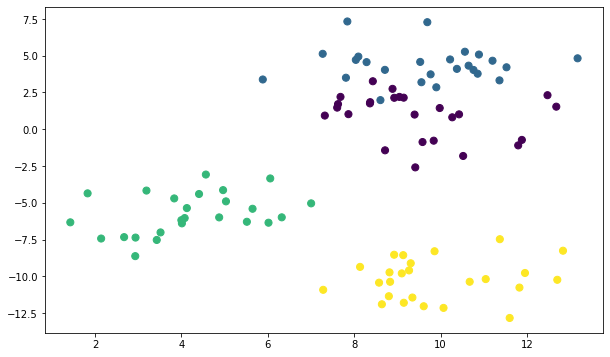

In [29]:
#create synthetic dataset
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 4,
                       cluster_std = 1.5, random_state = 4)

#scatter plot of dataset
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c=y, marker= 'o', s=50)
plt.show()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [128]:
knn5 = KNeighborsClassifier() #k=5
knn1 = KNeighborsClassifier(n_neighbors=1) #k=1

In [129]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [130]:
y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score
print("Accuracy of kNN with k=5", accuracy_score(y_test, y_pred_5))
print("Accuracy of kNN with k=1", accuracy_score(y_test, y_pred_1))

Accuracy of kNN with k=5 0.7631578947368421
Accuracy of kNN with k=1 0.7368421052631579


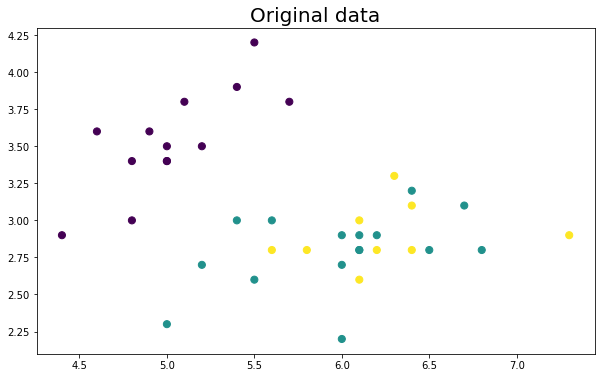

In [132]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=50)
plt.title("Original data", fontsize=20)
plt.show()

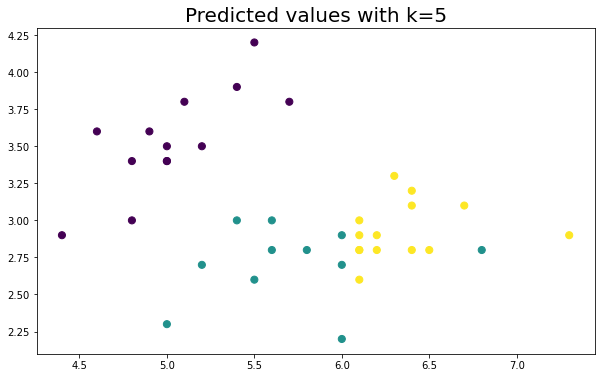

In [133]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= 'o', s=50)
plt.title("Predicted values with k=5", fontsize=20)
plt.show()

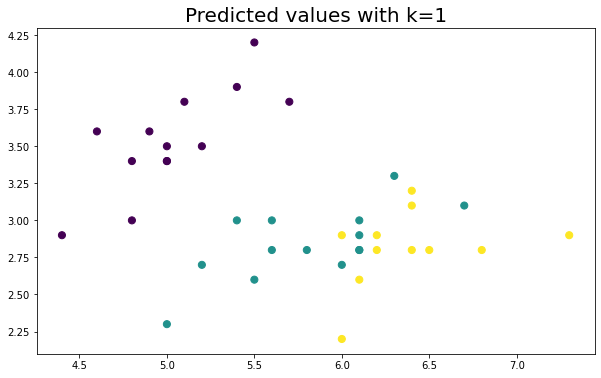

In [134]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= 'o', s=50)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

How to find the best k value

- k=1: The model is too specific and not generalized well. It also tends to be sensitive to noise. The model accomplishes a high accuracy on train set but will be a poor predictor on new, previously unseen data points. Therefore, we are likely to end up with an overfit model.
- k=100: The model is too generalized and not a good predictor on both train and test sets. This situation is known as underfitting.

### Data split during training

#### K-fold cross-validation

![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

The following example demonstrates how to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [135]:
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [136]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [137]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:

In [138]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')

When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default, the latter being used if the estimator derives from ClassifierMixin.

It is also possible to use other cross validation strategies by passing a cross validation iterator instead, for instance:`

In [140]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

The ***cross_validate*** function differs from ***cross_val_score*** in two ways:

It allows specifying multiple metrics for evaluation.

It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [141]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro', 'accuracy']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
scores

{'fit_time': array([0.0019989 , 0.00152254, 0.00200248, 0.00099897, 0.00099969]),
 'score_time': array([0.00401402, 0.00199556, 0.00299931, 0.00200057, 0.00199914]),
 'test_precision_macro': array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ]),
 'test_recall_macro': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 'test_accuracy': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])}

### Cross validation iterators

#### KFold

**KFold** divides all the samples in k groups of samples, called folds (if k=n, this is equivalent to the **Leave One Out** strategy), of equal sizes (if possible). The prediction function is learned using  folds, and the fold left out is used for test.

Example of 2-fold cross-validation on a dataset with 4 samples:

In [142]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))



[2 3] [0 1]
[0 1] [2 3]


Here is a visualization of the cross-validation behavior. Note that KFold is not affected by classes or groups.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png)

Each fold is constituted by two arrays: the first one is related to the training set, and the second one to the test set.

####  Repeated K-Fold

RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

Example of 2-fold K-Fold repeated 2 times:

In [143]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


####  Stratified k-fold

**StratifiedKFold** is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

Here is an example of stratified 3-fold cross-validation on a dataset with 50 samples from two unbalanced classes. We show the number of samples in each class and compare with KFold.

In [51]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

print(100*'-')

kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]
----------------------------------------------------------------------------------------------------
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


We can see that **StratifiedKFold** preserves the class ratios (approximately 1 / 10) in both train and test dataset.

Here is a visualization of the cross-validation behavior.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png)

#### Random permutations cross-validation a.k.a. Shuffle & Split

The **ShuffleSplit** iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

Here is a usage example:

In [53]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_008.png)

### Stratified Shuffle Split

StratifiedShuffleSplit is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

Here is a visualization of the cross-validation behavior.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_012.png)

## Tuning the hyper-parameters of an estimator

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

In [144]:
estimator = KNeighborsClassifier()
estimator.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [145]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

A search consists of:

- an estimator (regressor or classifier such as sklearn.svm.SVC());

- a parameter space;

- a method for searching or sampling candidates;

- a cross-validation scheme; and

- a score function.

Two generic approaches to parameter search are provided in scikit-learn: for given values, **GridSearchCV** exhaustively considers all parameter combinations, while **RandomizedSearchCV** can sample a given number of candidates from a parameter space with a specified distribution. Both these tools have successive halving counterparts **HalvingGridSearchCV** and **HalvingRandomSearchCV**, which can be much faster at finding a good parameter combination.

### Grid Search

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:

In [67]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

specifies that two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], and the second one with an RBF kernel, and the cross-product of C values ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].

The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

### Randomized Parameter Optimization

While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favourable properties. RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

A budget can be chosen independent of the number of parameters and possible values.

Adding parameters that do not influence the performance does not decrease efficiency.

Specifying how parameters should be sampled is done using a dictionary, very similar to specifying parameters for GridSearchCV. Additionally, a computation budget, being the number of sampled candidates or sampling iterations, is specified using the n_iter parameter. For each parameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified:

In [70]:
import scipy

In [71]:
{
    'C': scipy.stats.expon(scale=100), 
    'gamma': scipy.stats.expon(scale=.1),
    'kernel': ['rbf'], 
    'class_weight':['balanced', None]
}

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x1c95cc8a400>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1c95cc7d850>,
 'kernel': ['rbf'],
 'class_weight': ['balanced', None]}

In [146]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# get some data
X, y = load_digits(return_X_y=True)

# build a classifier
clf = SGDClassifier(loss="hinge", penalty="elasticnet", fit_intercept=True)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": loguniform(1e-4, 1e0),
}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-4, 1, dtype=float)),
}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)
report(grid_search.cv_results_)

RandomizedSearchCV took 21.90 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.923 (std: 0.027)
Parameters: {'alpha': 0.00019172350035116692, 'average': True, 'l1_ratio': 0.7968908485714598}

Model with rank: 2
Mean validation score: 0.917 (std: 0.029)
Parameters: {'alpha': 0.0001171110451227531, 'average': False, 'l1_ratio': 0.6143597454749462}

Model with rank: 3
Mean validation score: 0.915 (std: 0.030)
Parameters: {'alpha': 0.00025201374758197835, 'average': False, 'l1_ratio': 0.2690709818764456}



C:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iter

GridSearchCV took 122.43 seconds for 100 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.932 (std: 0.032)
Parameters: {'alpha': 1.0, 'average': False, 'l1_ratio': 0.0}

Model with rank: 2
Mean validation score: 0.929 (std: 0.029)
Parameters: {'alpha': 0.0001, 'average': True, 'l1_ratio': 0.5555555555555556}

Model with rank: 3
Mean validation score: 0.927 (std: 0.029)
Parameters: {'alpha': 1.0, 'average': True, 'l1_ratio': 0.0}

